In [3]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [4]:
provider = IBMQ.providers()[0]

In [5]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [6]:
backend = provider.get_backend('ibmq_qasm_simulator')

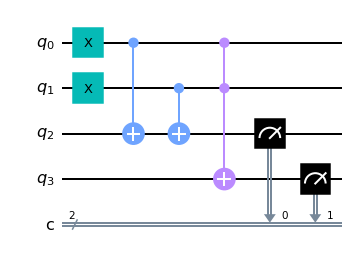

In [10]:
# So basically I am using a Toffoli gate (ccx) to mimic the AND gate and a Controlled-NOT for classical XOR gate.
# 4 bits input (the first two containing the bits to add and others are 0) and 2 bits output (meausuring the last two bits)
qCircuit = QuantumCircuit(4, 2)

# Encoding the input here
qCircuit.x(0)
qCircuit.x(1)
# Encoding ends here

# Controlled-NOT gate on 1st and 3rd bit the output will be written on the second bit. b3 = b1 XOR b3 = b1
# because b3 in initially 0
qCircuit.cx(0, 2)

# Controlled-NOT gate on 2nd and 3rd bit. b3 = b3 XOR b2 = b1 XOR b2
qCircuit.cx(1, 2)

# Now the XOR is stored on the 3rd bit, and the first two bits are unchanged, Toffoli gate will do the AND operation, and can calculate the carry.
# Carry will be stored on the 4th bit.
qCircuit.ccx(0, 1, 3)

# measure the last two bits in the first and second position
qCircuit.measure(2, 0)
qCircuit.measure(3, 1)

# see if the circuit is right or not
qCircuit.draw()

In [11]:
# assembling the circuit for the backend
qObj = assemble(qCircuit)

# the result, after the circuit runs on the backend, contains the counts (and thus the probabilities) of all measuring possibilities.
result = backend.run(qObj).result()

In [13]:
count = result.get_counts()

# find the result corresponding to maximum count
mx = max(count, key=count.get)
print("The result of 1 + 1 is: ", end = "")
print(mx)

The result of 1 + 1 is: 10
